                            p         T      Tpot      Tdew        rh  \
date                                                                    
2020-01-01 00:10:00  0.826640  0.173375  0.162785  0.363742  0.823694   
2020-01-01 00:20:00  0.824624  0.174345  0.163717  0.360536  0.812278   
2020-01-01 00:30:00  0.823073  0.173860  0.163484  0.359370  0.811010   
2020-01-01 00:40:00  0.822763  0.165131  0.155333  0.354707  0.826230   
2020-01-01 00:50:00  0.822298  0.164161  0.154401  0.358788  0.840183   

                        VPmax     VPact     VPdef        sh      H2OC  ...  \
date                                                                   ...   
2020-01-01 00:10:00  0.051252  0.156321  0.021140  0.150355  0.151515  ...   
2020-01-01 00:20:00  0.051638  0.154055  0.022565  0.148227  0.149733  ...   
2020-01-01 00:30:00  0.051445  0.153602  0.022803  0.148227  0.148841  ...   
2020-01-01 00:40:00  0.048170  0.150430  0.020428  0.145390  0.146168  ...   
2020-01-01 00:50:00 

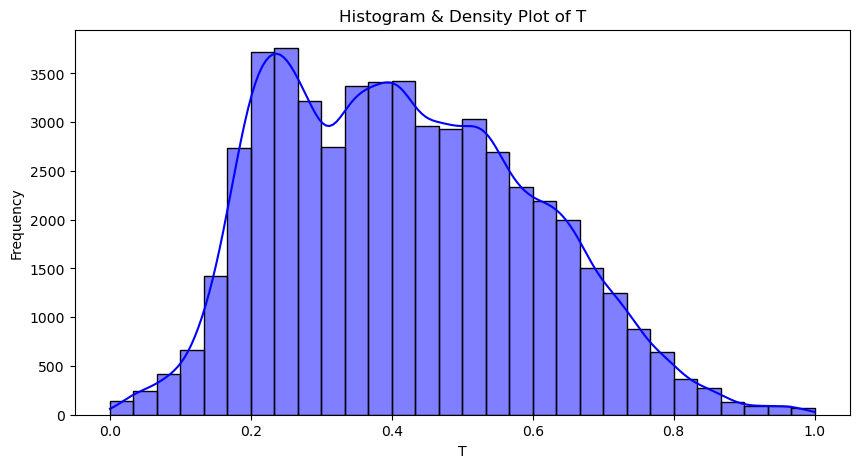

C:\Users\harsh\AppData\Local\Temp\ipykernel_8584\311884718.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[time_period], y=df[column], palette='coolwarm')


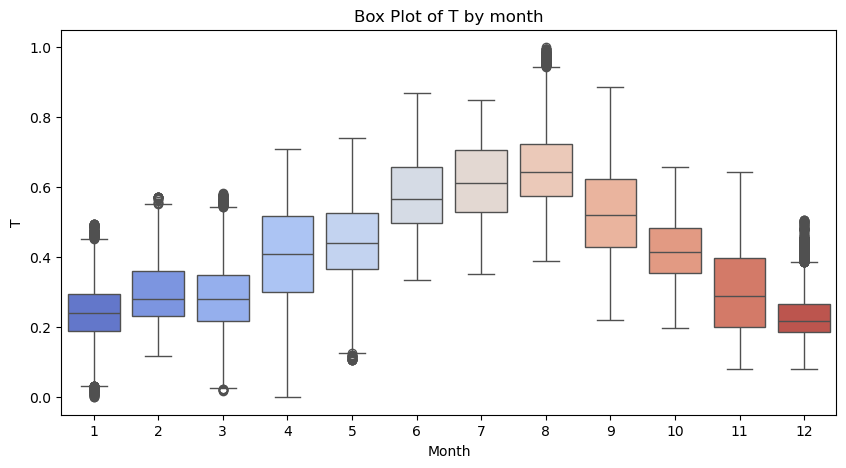

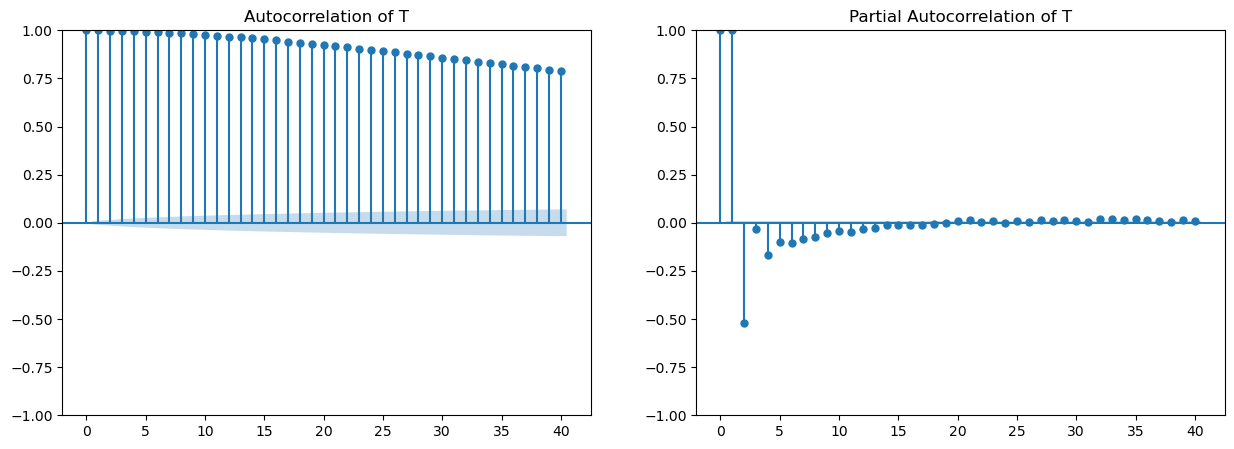

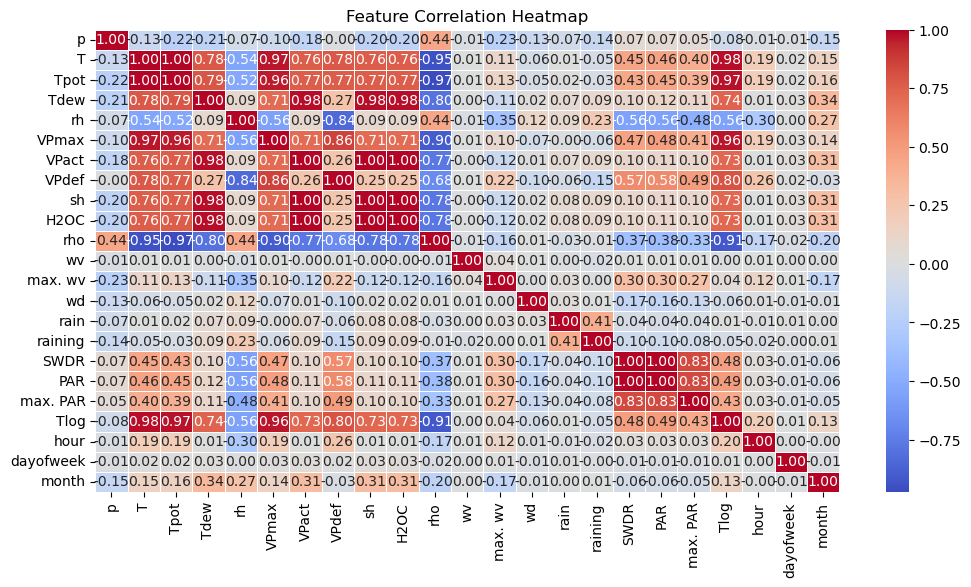

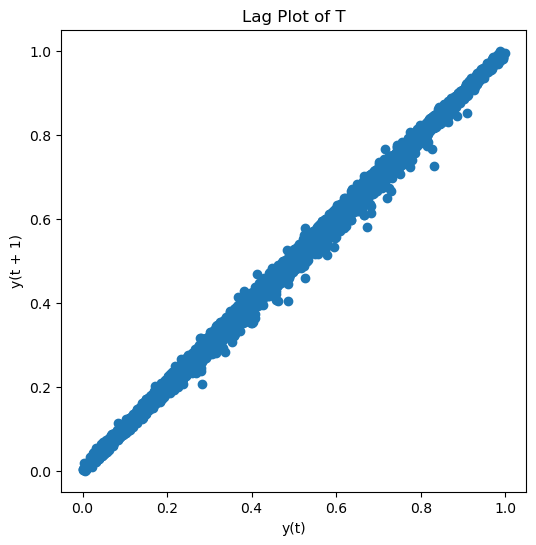

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
import statsmodels.api as sm

def load_data():
    """Loads the dataset with datetime index."""
    df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')
    return df

def clean_data(df):
    """Handles missing values properly."""
    df = df.ffill().bfill()  # Forward and backward fill
    df.dropna(inplace=True)  # Ensure no NaN values remain
    return df

def normalize_data(df):
    """Normalizes the data using Min-Max Scaling."""
    df = (df - df.min()) / (df.max() - df.min())
    return df

def add_features(df):
    """Adds useful time-based features."""
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    return df

def histogram_density_plot(df, column='T'):
    """Plots a histogram and density plot of a selected column."""
    plt.figure(figsize=(10,5))
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Histogram & Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def box_plot_by_time(df, column='T', time_period='month'):
    """Creates a box plot grouped by time intervals (month, day of the week, etc.)."""
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[time_period], y=df[column], palette='coolwarm')
    plt.title(f'Box Plot of {column} by {time_period}')
    plt.xlabel(time_period.capitalize())
    plt.ylabel(column)
    plt.show()

def autocorrelation_pacf_plot(df, column='T'):
    """Plots autocorrelation and partial autocorrelation of a selected column."""
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sm.graphics.tsa.plot_acf(df[column], lags=40, ax=ax[0])
    sm.graphics.tsa.plot_pacf(df[column], lags=40, ax=ax[1])
    ax[0].set_title(f'Autocorrelation of {column}')
    ax[1].set_title(f'Partial Autocorrelation of {column}')
    plt.show()

def heatmap_correlation(df):
    """Plots a heatmap to show correlations between numerical columns."""
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.show()

def lag_plot_visualization(df, column='T'):
    """Creates a lag plot to check for patterns over time."""
    plt.figure(figsize=(6,6))
    lag_plot(df[column])
    plt.title(f'Lag Plot of {column}')
    plt.show()

def main():
    df = load_data()
    df = clean_data(df)
    df = normalize_data(df)
    df = add_features(df)

    print(df.head())  # Display first few rows

    # Visualizations
    histogram_density_plot(df, 'T')  # 1. Histogram & Density Plot
    box_plot_by_time(df, 'T', 'month')  # 2. Box Plot by Month
    autocorrelation_pacf_plot(df, 'T')  # 3. ACF & PACF
    heatmap_correlation(df)  # 4. Correlation Heatmap
    lag_plot_visualization(df, 'T')  # 5. Lag Plot

if __name__ == "__main__":
    main()
